In [24]:
%matplotlib inline

import autolens as al
import autolens.plot as aplt
from astropy import cosmology

In [36]:
# Create grid
image_plane_grid = al.grid.uniform(
    shape_2d=(100, 100), pixel_scales=0.05, sub_size=1
)

Redshift is proportional to distance, and einstein_radius is proportional to mass, thus, density. 
Need to create a series of galaxies to simulate linear density change.

In [37]:
# Create continous mass_profiles and lens_galaxys
mass_profiles = []
for i in range(10):
    mass_profile = al.mp.SphericalIsothermal(centre=(0.0, 0.0), einstein_radius=1.0+i/100)
    mass_profiles.append(mass_profile)

lens_galaxys = []
for i in range(10):
    lens_galaxy = al.Galaxy(redshift=i/100.0, mass=mass_profiles[i])
    lens_galaxys.append(lens_galaxy)

light_profile = al.lp.SphericalSersic(
    centre=(0.0, 0.0), intensity=1.0, effective_radius=1.0, sersic_index=1.0
)

source_galaxy = al.Galaxy(redshift=1.0, light=light_profile)

In [38]:
lens_galaxys.append(source_galaxy)
tracer = al.Tracer.from_galaxies(galaxies=lens_galaxys,cosmology=cosmology.Planck15)

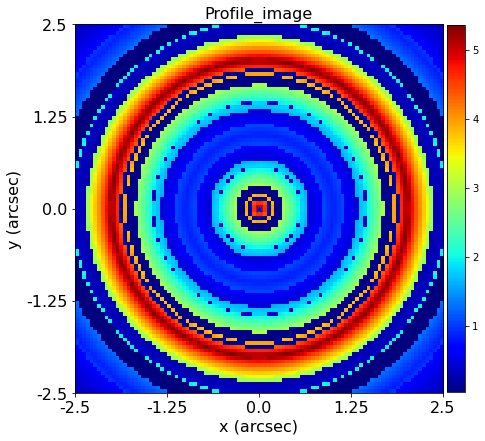

In [39]:
aplt.tracer.profile_image(tracer=tracer, grid=image_plane_grid)

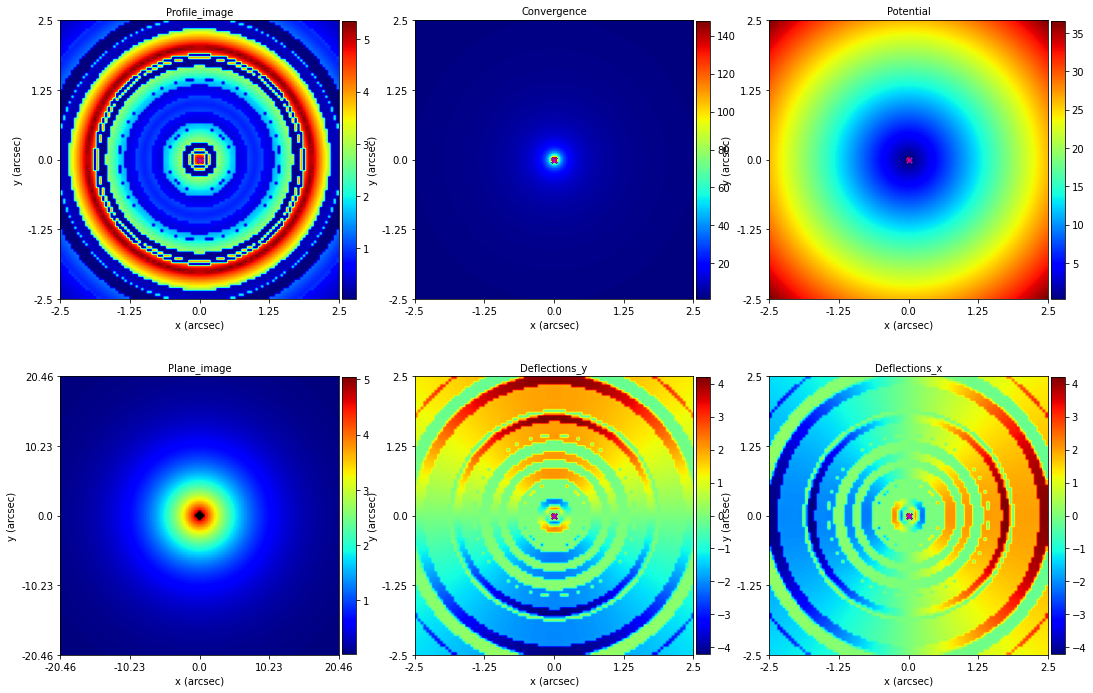

In [40]:
aplt.tracer.subplot_tracer(tracer=tracer, grid=image_plane_grid)

In [41]:
psf = al.kernel.from_gaussian(shape_2d=(11, 11), sigma=0.1, pixel_scales=0.1)

In [42]:
normal_image = tracer.profile_image_from_grid(grid=image_plane_grid)
padded_image = tracer.padded_profile_image_from_grid_and_psf_shape(
    grid=image_plane_grid, psf_shape_2d=psf.shape_2d
)

In [43]:
simulator = al.simulator.imaging(
    shape_2d=image_plane_grid.shape_2d,
    pixel_scales=0.1,
    sub_size=image_plane_grid.sub_size,
    exposure_time=300.0,
    psf=psf,
    background_level=0.1,
    add_noise=True,
)

imaging = simulator.from_tracer(tracer=tracer)

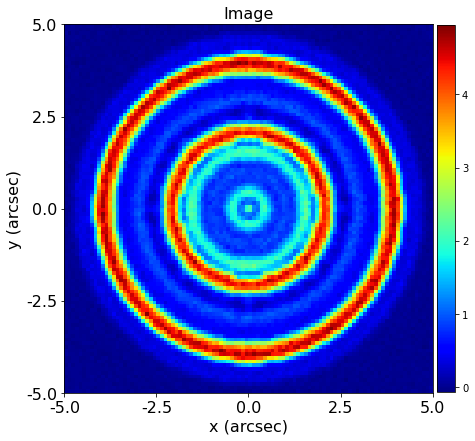

In [44]:
aplt.imaging.image(imaging=imaging)